In [ ]:
import pandas as pd

# 기본환경 세팅 확인

In [1]:
!nvidia-smi

Wed Nov 27 05:45:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## CPU 대비 GPU에서 TensorFlow 속도 향상 관찰

- TensorFlow를 사용하여 CPU와 GPU에서 Conv2D 레이어를 적용한 후, 두 장치의 성능을 비교합니다.
- 각 장치에서 무작위 이미지를 생성하고, Conv2D 레이어를 적용한 후 결과의 합을 계산합니다.
- timeit 모듈을 사용하여 연산 시간을 측정하고, GPU가 CPU에 비해 얼마나 빠른지 계산합니다.

In [3]:
import tensorflow as tf
import timeit

# GPU 디바이스 이름을 가져옵니다.
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':  # GPU가 없는 경우 오류 메시지 출력
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')  # 시스템 오류 발생

# CPU에서 실행할 함수 정의
def cpu():
  with tf.device('/cpu:0'):  # CPU 디바이스 사용
    random_image_cpu = tf.random.normal((100, 100, 100, 3))  # 무작위 이미지 생성
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)  # Conv2D 레이어 적용
    return tf.math.reduce_sum(net_cpu)  # 결과의 합 계산

# GPU에서 실행할 함수 정의
def gpu():
  with tf.device('/device:GPU:0'):  # GPU 디바이스 사용
    random_image_gpu = tf.random.normal((100, 100, 100, 3))  # 무작위 이미지 생성
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)  # Conv2D 레이어 적용
    return tf.math.reduce_sum(net_gpu)  # 결과의 합 계산

# 각 연산을 한 번씩 실행하여 워밍업을 수행합니다.
cpu()
gpu()

# 연산을 여러 번 실행하여 성능을 측정합니다.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')

# CPU 성능 측정
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

# GPU 성능 측정
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

# GPU의 CPU 대비 성능 향상 비율 계산 및 출력
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
6.764310766999984
GPU (s):
0.1837225970000418
GPU speedup over CPU: 36x


## Tensorflow 버전 확인
- 11월 27

In [4]:
## Tensorflow 버전 확인

import tensorflow as tf
print(tf.__version__)

2.17.1


## Tensor 기본문법


In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np

x = np.array(12)
tensor_x = tf.convert_to_tensor(x) # np배열을 Tensorflow Tensor로 변환

print(x, tensor_x)

12 tf.Tensor(12, shape=(), dtype=int64)


In [6]:
y = np.array([1,2,3,4,5])
tensor_y = tf.convert_to_tensor(y)

print(y, tensor_y)

[1 2 3 4 5] tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)


In [7]:
z = np.array([[1,2,3],[4,5,6], [7,8,9]])
tensor_z = tf.convert_to_tensor(z)

print(z, tensor_z)

[[1 2 3]
 [4 5 6]
 [7 8 9]] tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int64)


In [8]:
# 3차원 numpy 배열 생성
t = np.array([[[5, 78, 2, 34, 0],   # 첫 번째 2차원 배열
               [6, 79, 3, 35, 1],   # 첫 번째 2차원 배열의 두 번째 행
               [7, 80, 4, 36, 2]],  # 첫 번째 2차원 배열의 세 번째 행
              [[5, 78, 2, 34, 0],   # 두 번째 2차원 배열
               [6, 79, 3, 35, 1],   # 두 번째 2차원 배열의 두 번째 행
               [7, 80, 4, 36, 2]],  # 두 번째 2차원 배열의 세 번째 행
              [[5, 78, 2, 34, 0],   # 세 번째 2차원 배열
               [6, 79, 3, 35, 1],   # 세 번째 2차원 배열의 두 번째 행
               [7, 80, 4, 36, 2]]]) # 세 번째 2차원 배열의 세 번째 행

# numpy 배열을 TensorFlow 텐서로 변환
tensor_t = tf.convert_to_tensor(t)  # numpy 배열을 TensorFlow 텐서로 변환

# 텐서와 텐서의 차원 출력
print(tensor_t, tensor_t.ndim)  # 텐서 값과 텐서의 차원(ndim)을 출력

tf.Tensor(
[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]], shape=(3, 3, 5), dtype=int64) 3


## 이미지 불러와서 텐서 확인

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [12]:
train_images.ndim

3

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
train_images.dtype

dtype('uint8')

## 이미지 출력

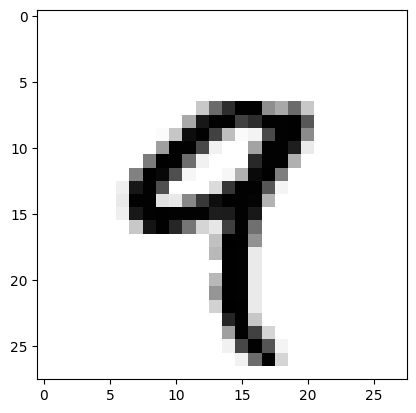

In [15]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## NumPy로 텐서 조작
- 슬라이싱 / 인덱싱이 가능함.

In [16]:
# train_images 배열에서 10번째부터 99번째까지의 이미지 슬라이스
# 첫 번째 차원(이미지)의 10~99번째 슬라이스
my_slice1 = train_images[10:100]

# train_images 배열에서 10번째부터 99번째까지의 이미지 슬라이스
# 여기서 :,: 는 두 번째와 세 번째 차원(이미지의 행과 열) 전체를 선택
# 첫 번째 차원에서 10~99번째, 두 번째 및 세 번째 차원 전체 슬라이스
my_slice2 = train_images[10:100, :, :]

# train_images 배열에서 10번째부터 99번째까지의 이미지 슬라이스
# 0:28, 0:28 은 두 번째와 세 번째 차원 전체를 명시적으로 선택
# 첫 번째 차원에서 10~99번째, 두 번째와 세 번째 차원에서 0~27번째 슬라이스
my_slice3 = train_images[10:100, 0:28, 0:28]

# 각 슬라이스의 형태를 출력합니다.
my_slice1.shape, my_slice2.shape, my_slice3.shape  # 각 슬라이스의 형태 (shape)를 출력


((90, 28, 28), (90, 28, 28), (90, 28, 28))

- 배치 데이터

In [17]:
# train_images 배열에서 처음 128개의 이미지 슬라이스
# 첫 번째 차원(이미지)의 0~127번째 슬라이스
batch1 = train_images[:128]

# train_images 배열에서 128번째부터 255번째까지의 이미지를 슬라이스
# 첫 번째 차원(이미지)의 128~255번째 슬라이스
batch2 = train_images[128:256]

# 각 배치의 형태를 출력
# batch1과 batch2의 형태(shape)를 출력
batch1.shape, batch2.shape

((128, 28, 28), (128, 28, 28))

In [18]:
# n 변수를 3으로 설정
n = 3

# train_images 배열에서 384번째(128 * 3)부터 511번째(128 * (3 + 1) - 1)까지의 이미지 슬라이스
# 첫 번째 차원(이미지)의 384~511번째 슬라이스
batch3 = train_images[128 * n:128 * (n + 1)]

# batch3의 형태를 출력
# batch3의 형태(shape)를 출력
batch3.shape

(128, 28, 28)

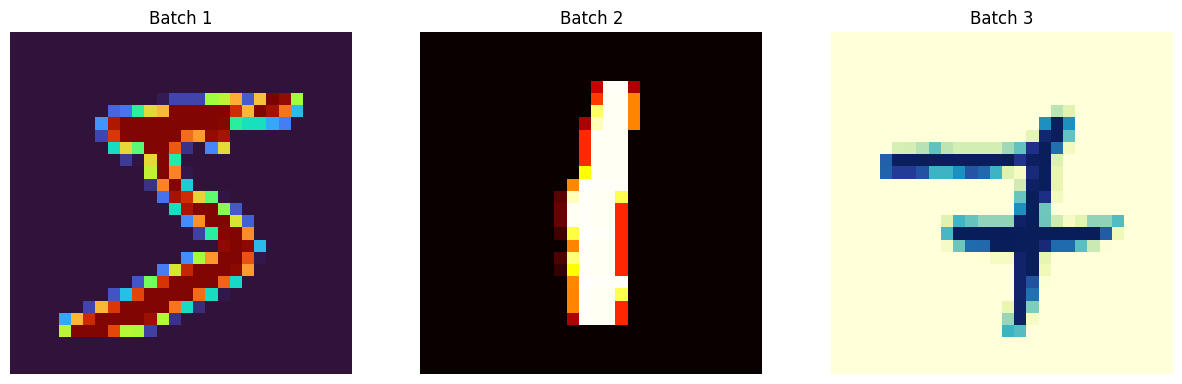

In [26]:
# 각 배치에서 이미지를 시각화하기 위해 서브플롯을 생성합니다.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1행 3열의 서브플롯을 생성, 전체 크기는 15x5 인치

# batch1에서 첫 번째 이미지를 표시합니다.
axes[0].imshow(batch1[0], cmap='turbo')  # cmap='gray'는 이미지를 회색조로 표시 (이미지가 회색조가 아니면 cmap를 조정)
axes[0].set_title('Batch 1')  # 서브플롯 제목 설정
axes[0].axis('off')  # 축을 숨깁니다.

# batch2에서 첫 번째 이미지를 표시합니다.
axes[1].imshow(batch2[0], cmap='hot')  # cmap='gray'는 이미지를 회색조로 표시 (이미지가 회색조가 아니면 cmap를 조정)
axes[1].set_title('Batch 2')  # 서브플롯 제목 설정
axes[1].axis('off')  # 축을 숨깁니다.

# batch3에서 첫 번째 이미지를 표시합니다.
axes[2].imshow(batch3[0], cmap='YlGnBu')  # cmap='gray'는 이미지를 회색조로 표시 (이미지가 회색조가 아니면 cmap를 조정)
axes[2].set_title('Batch 3')  # 서브플롯 제목 설정
axes[2].axis('off')  # 축을 숨깁니다.

# 이미지를 화면에 표시합니다.
plt.show()

## 원소별 연산
- element-wise operation
  + Python code
  + NumPy Code
  + tensorflow Code

In [29]:
import time
import numpy as np
import random
import tensorflow as tf
import pandas as pd

# 두 개의 1000x1000 행렬을 무작위 숫자로 생성
# 첫 번째 1000x1000 리스트 생성
a1_list = [[random.randint(0, 100) for _ in range(1000)] for _ in range(1000)]

# 두 번째 1000x1000 리스트 생성
a2_list = [[random.randint(0, 100) for _ in range(1000)] for _ in range(1000)]

# 리스트를 numpy 배열로 변환
# 첫 번째 리스트를 numpy 배열로 변환
# 두 번째 리스트를 numpy 배열로 변환
a1_np = np.array(a1_list)
a2_np = np.array(a2_list)

# 리스트를 TensorFlow 텐서로 변환
# 첫 번째 리스트를 TensorFlow 텐서로 변환
a1_tf = tf.constant(a1_list, dtype=tf.int32)

# 두 번째 리스트를 TensorFlow 텐서로 변환
a2_tf = tf.constant(a2_list, dtype=tf.int32)

# Python 리스트를 사용하여 요소별 곱셈을 수행하는 함수
def element_wise_multiply(mat1, mat2):

    result = [[0 for _ in range(len(mat1[0]))] for _ in range(len(mat1))]
    for i in range(len(mat1)):  # 첫 번째 차원을 반복
        for j in range(len(mat1[0])):  # 두 번째 차원을 반복
            result[i][j] = mat1[i][j] * mat2[i][j]  # 요소별 곱셈 수행
    return result

# 함수를 사용하여 요소별 곱셈 수행
start_time = time.time()  # 시작 시간 기록
result_list = element_wise_multiply(a1_list, a2_list)  # Python 리스트로 요소별 곱셈 수행
python_time = time.time() - start_time  # 걸린 시간 계산

# NumPy를 사용하여 요소별 곱셈 수행
start_time = time.time()  # 시작 시간 기록
result_numpy = np.multiply(a1_np, a2_np)  # NumPy로 요소별 곱셈 수행
numpy_time = time.time() - start_time  # 걸린 시간 계산

# TensorFlow를 사용하여 요소별 곱셈 수행
with tf.device('/GPU:0'):  # GPU에서 연산을 수행
    start_time = time.time()  # 시작 시간 기록
    result_tensorflow = tf.multiply(a1_tf, a2_tf)  # TensorFlow로 요소별 곱셈 수행
    tensorflow_time = time.time() - start_time  # 걸린 시간 계산

# NumPy와 TensorFlow가 Python for 루프보다 얼마나 더 빠른지 계산
numpy_faster = python_time / numpy_time  # NumPy가 Python보다 얼마나 더 빠른지 계산
tensorflow_faster = python_time / tensorflow_time  # TensorFlow가 Python보다 얼마나 더 빠른지 계산

# 결과를 사전(dictionary)에 저장
results = {
    "Method": ["Python for loop", "NumPy", "TensorFlow"],  # 메서드 이름
    "Time (seconds)": [python_time, numpy_time, tensorflow_time],  # 각 메서드의 수행 시간
    "Times Faster": [1, numpy_faster, tensorflow_faster],  # Python 대비 몇 배 빠른지
    "Sample result (first 10 elements of first row)": [
        result_list[0][:10],
        result_numpy[0][:10].tolist(),
        result_tensorflow.numpy()[0][:10].tolist()
    ]
}

# DataFrame 생성
results_df = pd.DataFrame(results)

# DataFrame 출력
print("\nResults DataFrame:")
print(results_df)  # 결과 DataFrame 출력


Results DataFrame:
            Method  Time (seconds)  Times Faster  \
0  Python for loop        0.226594      1.000000   
1            NumPy        0.002517     90.008808   
2       TensorFlow        0.001508    150.237591   

      Sample result (first 10 elements of first row)  
0  [210, 3520, 2356, 0, 522, 6000, 1025, 3510, 47...  
1  [210, 3520, 2356, 0, 522, 6000, 1025, 3510, 47...  
2  [210, 3520, 2356, 0, 522, 6000, 1025, 3510, 47...  


# 도함수

[0 1 2 3 4]
[0 2 4 6 8]


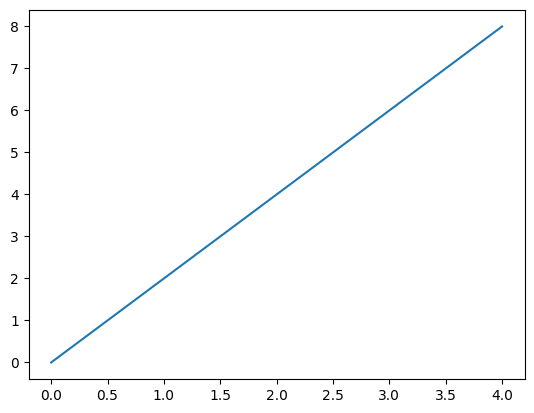

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 함수 정의
def f(x):
    return 2 * x  # 입력 x에 2를 곱하여 반환

# x 값의 배열 생성
x = np.array(range(5))  # 0에서 4까지의 정수를 포함하는 numpy 배열 생성

# 함수 f(x)를 사용하여 y 값 계산
y = f(x)  # x 배열의 각 요소에 대해 f(x) 함수를 적용하여 y 값 계산

# x와 y 값을 출력
print(x)  # x 배열 출력
print(y)  # y 배열 출력

# x와 y 값을 사용하여 그래프 그리기
plt.plot(x, y)  # x 값과 y 값을 사용하여 선 그래프를 그림
plt.show()  # 그래프를 화면에 표시


In [31]:
# 함수 정의
def f(x):
    return 2 * x ** 2  # 입력 x의 제곱에 2를 곱하여 반환

# y 값 계산
y = f(x)  # x 배열의 각 요소에 대해 f(x) 함수를 적용하여 y 값 계산

# x와 y 값을 출력
print(x)  # x 배열 출력
print(y)  # y 배열 출력

# 첫 번째 구간의 평균 변화율 계산 및 출력
print((y[1] - y[0]) / (x[1] - x[0]))  # x의 0과 1 사이 구간의 y 값 변화율 계산

# 세 번째 구간의 평균 변화율 계산 및 출력
print((y[3] - y[2]) / (x[3] - x[2]))  # x의 2와 3 사이 구간의 y 값 변화율 계산

[0 1 2 3 4]
[ 0  2  8 18 32]
2.0
10.0


x values: [-1  0  1  2  3  4  5]
y values: [ 2  0  2  8 18 32 50]
Slope between x[0] and x[1]: -2.0
Slope between x[2] and x[3]: 6.0


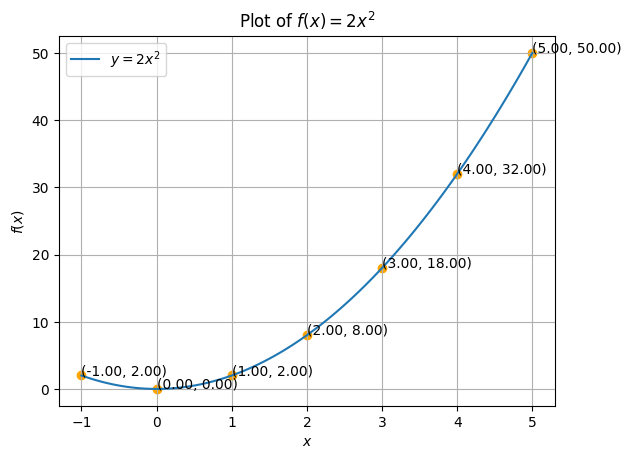

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x):
    return 2 * x ** 2  # 입력 x의 제곱에 2를 곱한 값을 반환

# x 값 생성
x_values = np.array([-1, 0, 1, 2, 3, 4, 5])  # x 값 배열 생성

# 함수 값을 계산
y_values = f(x_values)  # x 값에 대해 f(x) 값을 계산

# x와 y 값 출력
print("x values:", x_values)  # x 값 출력
print("y values:", y_values)  # y 값 출력

# 특정 점들 사이의 기울기 계산
slope_1 = (y_values[1] - y_values[0]) / (x_values[1] - x_values[0])  # x[0]과 x[1] 사이의 기울기 계산
slope_2 = (y_values[3] - y_values[2]) / (x_values[3] - x_values[2])  # x[2]와 x[3] 사이의 기울기 계산

# 기울기 출력
print("Slope between x[0] and x[1]:", slope_1)  # 첫 번째 구간의 기울기 출력
print("Slope between x[2] and x[3]:", slope_2)  # 두 번째 구간의 기울기 출력

# 플롯 생성
fig, ax = plt.subplots()  # 서브플롯 생성

# 함수의 그래프를 그림
x = np.linspace(-1, 5, 100)  # -1부터 5까지 100개의 점을 생성
y = f(x)  # 각 점에 대해 f(x) 값을 계산
ax.plot(x, y, label='$y = 2x^2$')  # 함수의 그래프를 그림, 라벨 추가

# 기울기 계산에 사용된 점들을 표시하고 주석 추가
ax.scatter(x_values, y_values, color='orange')  # 점들을 산포도로 표시
for i in range(len(x_values)):  # 각 점에 대해 주석 추가
    ax.annotate(f'({x_values[i]:.2f}, {y_values[i]:.2f})', (x_values[i], y_values[i]))  # 점의 좌표를 주석으로 추가

# 라벨 및 제목 추가
ax.set_xlabel('$x$')  # x축 라벨 설정
ax.set_ylabel('$f(x)$')  # y축 라벨 설정
ax.set_title('Plot of $f(x) = 2x^2$')  # 그래프 제목 설정
ax.legend()  # 범례 추가
ax.grid(True)  # 그리드 추가

# 그래프를 화면에 표시
plt.show()

In [33]:
# 작은 델타 값 정의
p2_delta = 0.0001  # 근사치 계산을 위한 작은 델타 값

# x 값 정의
x1 = 1  # 미분할 점의 x 값
x2 = x1 + p2_delta  # x1에서 델타를 더한 값

# 함수 값 계산
y1 = f(x1)  # x1에서의 함수 값
y2 = f(x2)  # x2에서의 함수 값

# 근사 미분 값 계산
approximate_derivative = (y2 - y1) / (x2 - x1)  # 미분의 근사치 계산

# 근사 미분 값 출력
print(approximate_derivative)  # 근사 미분 값 출력

4.0001999999987845


(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


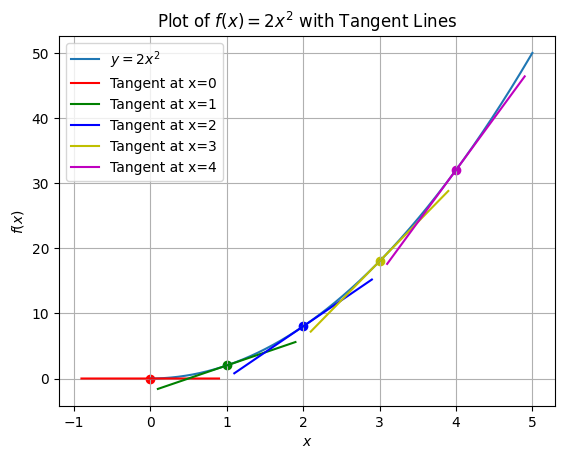

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x):
    return 2 * x ** 2  # 함수 f(x) = 2 * x^2 정의

# 접선의 근사 방정식 정의
def approximate_tangent_line(x, approximate_derivative, b):
    return (approximate_derivative * x) + b  # 근사 접선의 방정식

# 플롯 생성
fig, ax = plt.subplots()  # 서브플롯 생성

# 함수 그래프를 그리기 위한 x 값 생성
x = np.linspace(0, 5, 1000)  # 0에서 5까지 1000개의 x 값 생성
y = f(x)  # x 값에 대해 f(x) 값을 계산
ax.plot(x, y, label='$y = 2x^2$')  # 함수의 그래프를 그림

# 접선의 색상 리스트
colors = ['r', 'g', 'b', 'y', 'm']  # 접선의 색상 리스트 정의

# 접선을 그래프에 그림
for i in range(5):
    p2_delta = 0.0001  # 작은 델타 값 정의
    x1 = i  # 접선을 그릴 x 값
    x2 = x1 + p2_delta  # x1에 델타를 더한 값
    y1 = f(x1)  # x1에서의 함수 값
    y2 = f(x2)  # x2에서의 함수 값
    print((x1, y1), (x2, y2))  # 두 점 출력

    # 근사 미분 값 계산
    approximate_derivative = (y2 - y1) / (x2 - x1)  # 근사 미분 값 계산
    b = y2 - (approximate_derivative * x2)  # y절편 계산

    # 접선을 그릴 점 생성
    to_plot = np.array([x1 - 0.9, x1, x1 + 0.9])  # 접선을 그릴 x 값 범위 설정
    ax.scatter(x1, y1, c=colors[i])  # 접선의 시작점을 그래프에 표시
    ax.plot(to_plot, approximate_tangent_line(to_plot, approximate_derivative, b), c=colors[i], label=f'Tangent at x={x1}')  # 접선을 그리기

    print(f'Approximate derivative for f(x) where x = {x1} is {approximate_derivative}')  # 근사 미분 값 출력

# 라벨 및 제목 추가
ax.set_xlabel('$x$')  # x축 라벨 설정
ax.set_ylabel('$f(x)$')  # y축 라벨 설정
ax.set_title('Plot of $f(x) = 2x^2$ with Tangent Lines')  # 그래프 제목 설정
ax.legend()  # 범례 추가
ax.grid(True)  # 그리드 추가

# 그래프를 화면에 표시
plt.show()  # 그래프를 화면에 표시

## 경사 하강법

- 경사 하강법(Gradient Descent)은 비용 함수(cost function)의 최소값을 찾기 위해 반복적으로 가중치를 업데이트하는 최적화 알고리즘입니다.
- 이 알고리즘은 현재의 가중치에서 비용 함수의 기울기(gradient)를 빼서 가중치를 업데이트합니다.
- 기울기를 빼는 이유는 기울기가 가리키는 방향이 비용 함수가 증가하는 방향이기 때문입니다.
- 따라서 기울기의 반대 방향으로 가중치를 업데이트하여 비용 함수 값을 감소시킵니다.
- 수학적 설명
  + 경사 하강법에서 가중치 $W$는 다음과 같이 업데이트됩니다:
$$W = W - \alpha \frac{\partial J}{\partial W}$$

    * $( W $)는 가중치입니다.
    * $( \alpha $)는 학습률(learning rate)입니다.
    * $( \frac{\partial J}{\partial W} $)는 비용 함수 $( J $)에 대한 가중치의 기울기(gradient)입니다.

Optimal parameters: [[3.3588672 ]
 [3.52599845]]


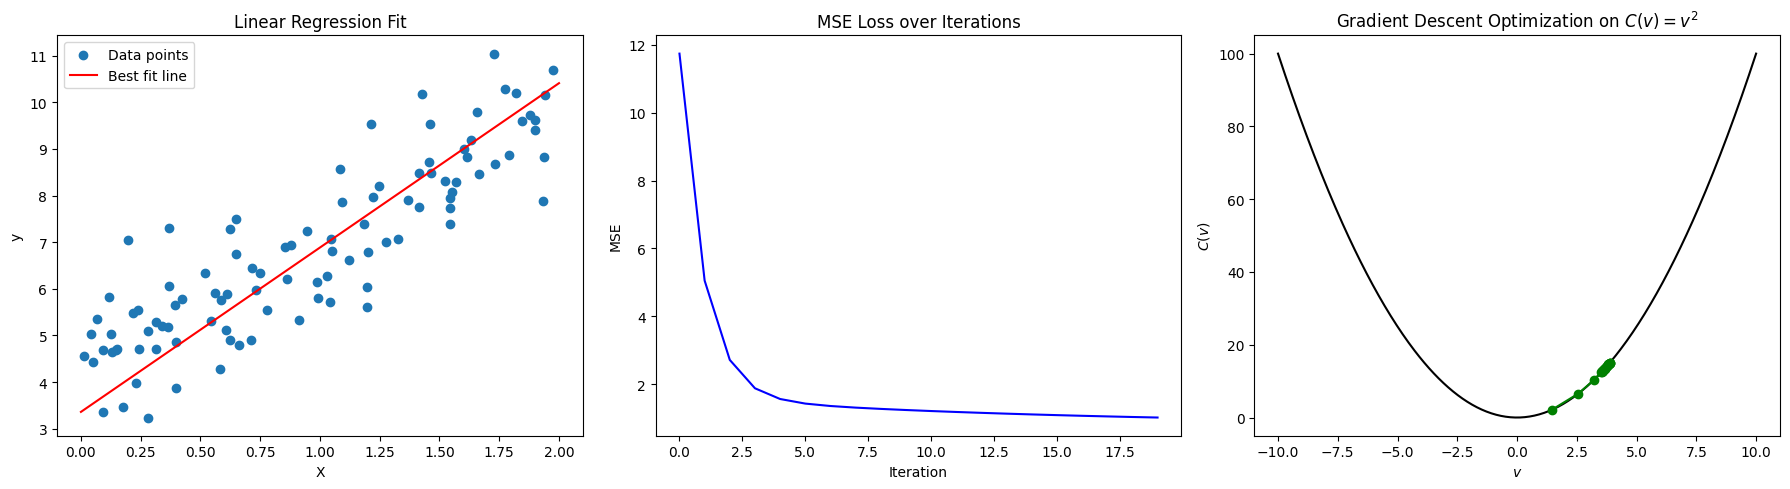

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 생성
np.random.seed(42)  # 난수 생성을 위한 시드 고정
X = 2 * np.random.rand(100, 1)  # 0에서 2 사이의 난수로 이루어진 100x1 배열 생성
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + N(0,1) 형태의 데이터 생성

# 각 인스턴스에 x0 = 1 추가 (절편 항을 위한)
X_b = np.c_[np.ones((100, 1)), X]  # 100x2 배열로 변환하여 첫 번째 열에 1 추가

# 하이퍼파라미터 설정
learning_rate = 0.1  # 학습률 설정
n_iterations = 20  # 반복 횟수 설정
m = len(X_b)  # 데이터 포인트 수 설정

# theta (매개변수) 초기화
theta = np.random.randn(2, 1)  # 2x1 크기의 난수로 초기화된 매개변수 벡터 생성

# 평균 제곱 오차 (MSE) 손실 함수 정의
def compute_mse(X, y, theta):
    predictions = X.dot(theta)  # 예측값 계산
    error = predictions - y  # 오차 계산
    mse = (1/m) * np.sum(error ** 2)  # 평균 제곱 오차 계산
    return mse

# 경사 하강법 수행
theta_history = [theta]  # 매개변수 히스토리 초기화
mse_history = []  # 손실 히스토리 초기화

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # 그래디언트 계산
    theta = theta - learning_rate * gradients  # 매개변수 업데이트
    theta_history.append(theta)  # 매개변수 히스토리 업데이트
    mse = compute_mse(X_b, y, theta)  # 현재 MSE 계산
    mse_history.append(mse)  # MSE 히스토리 업데이트

theta_history = np.array(theta_history)  # 매개변수 히스토리를 numpy 배열로 변환

print(f"Optimal parameters: {theta}")  # 최적 매개변수 출력

# 서브플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열의 서브플롯 생성

# 데이터와 모델의 예측값을 플롯
ax[0].scatter(X, y, label='Data points')  # 데이터 포인트 산점도
X_new = np.array([[0], [2]])  # 새로운 x 값 생성
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 새로운 x 값에 절편 항 추가
y_predict = X_new_b.dot(theta)  # 예측값 계산
ax[0].plot(X_new, y_predict, color='red', label='Best fit line')  # 최적선 플롯
ax[0].set_xlabel('X')  # x축 라벨 설정
ax[0].set_ylabel('y')  # y축 라벨 설정
ax[0].legend()  # 범례 추가
ax[0].set_title('Linear Regression Fit')  # 플롯 제목 설정

# 반복에 따른 MSE 손실을 플롯
ax[1].plot(range(n_iterations), mse_history, color='blue')  # MSE 히스토리 플롯
ax[1].set_xlabel('Iteration')  # x축 라벨 설정
ax[1].set_ylabel('MSE')  # y축 라벨 설정
ax[1].set_title('MSE Loss over Iterations')  # 플롯 제목 설정

# 비용 함수와 그래디언트 시각화를 위한 함수 정의
def cost_function(v):
    return v ** 2  # 비용 함수 정의

# 경사 하강법 시각화를 위한 비용 함수 플롯
v_values = np.linspace(-10, 10, 400)  # -10에서 10까지 400개의 v 값 생성
C_values = cost_function(v_values)  # 비용 함수 값 계산
ax[2].plot(v_values, C_values, color='black')  # 비용 함수 플롯

# 경사 하강법이 방문한 점들을 플롯
v_history = theta_history[:, 1]  # 기울기(θ1) 값만 추출
C_history = cost_function(v_history)  # 각 θ1 값에 대한 비용 함수 값 계산
ax[2].plot(v_history, C_history, marker='o', color='green')  # 방문한 점 플롯

# 그래디언트 하강법 플롯에 라벨 및 제목 추가
ax[2].set_xlabel('$v$')  # x축 라벨 설정
ax[2].set_ylabel('$C(v)$')  # y축 라벨 설정
ax[2].set_title('Gradient Descent Optimization on $C(v) = v^2$')  # 플롯 제목 설정

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프를 화면에 표시

Optimal parameters: [[-4.61900982]
 [-7.15169564]]


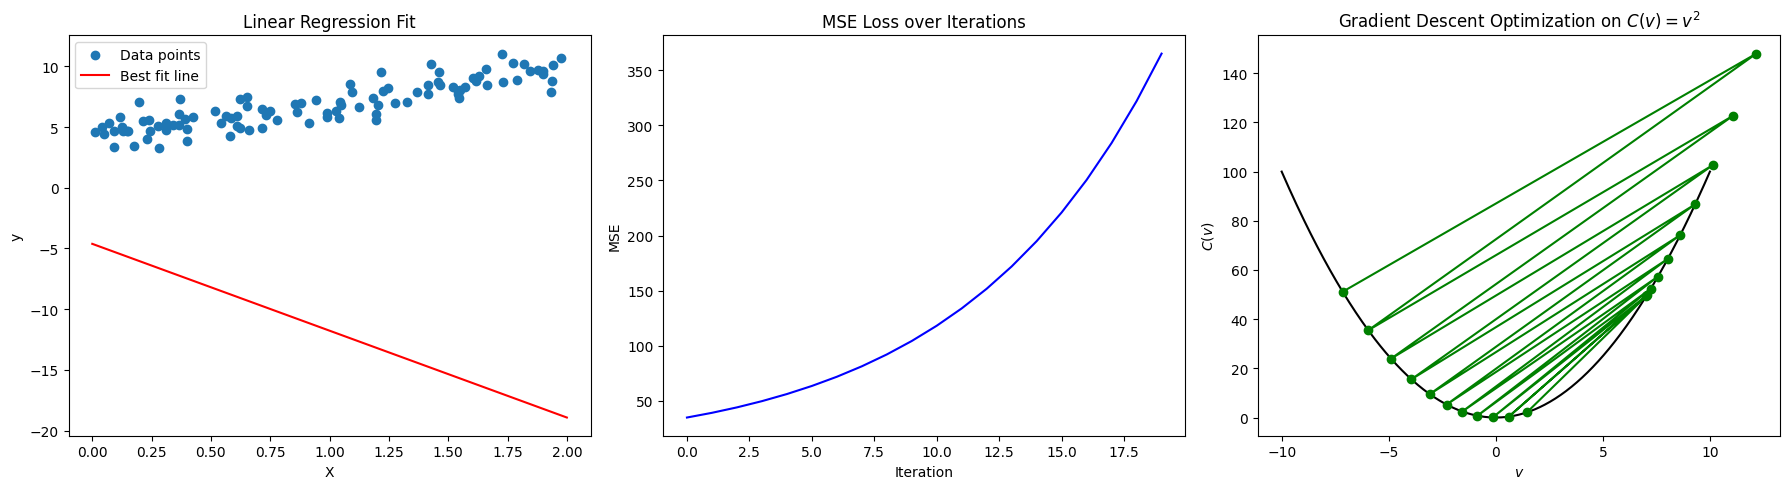

In [44]:
# 샘플 데이터 생성
np.random.seed(42)  # 난수 생성을 위한 시드 고정
X = 2 * np.random.rand(100, 1)  # 0에서 2 사이의 난수로 이루어진 100x1 배열 생성
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + N(0,1) 형태의 데이터 생성

# 각 인스턴스에 x0 = 1 추가 (절편 항을 위한)
X_b = np.c_[np.ones((100, 1)), X]  # 100x2 배열로 변환하여 첫 번째 열에 1 추가

# 하이퍼파라미터 설정
learning_rate = 0.5  # 학습률 설정
n_iterations = 20  # 반복 횟수 설정
m = len(X_b)  # 데이터 포인트 수 설정

# theta (매개변수) 초기화
theta = np.random.randn(2, 1)  # 2x1 크기의 난수로 초기화된 매개변수 벡터 생성

# 평균 제곱 오차 (MSE) 손실 함수 정의
def compute_mse(X, y, theta):
    predictions = X.dot(theta)  # 예측값 계산
    error = predictions - y  # 오차 계산
    mse = (1/m) * np.sum(error ** 2)  # 평균 제곱 오차 계산
    return mse

# 경사 하강법 수행
theta_history = [theta]  # 매개변수 히스토리 초기화
mse_history = []  # 손실 히스토리 초기화

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # 그래디언트 계산
    theta = theta - learning_rate * gradients  # 매개변수 업데이트
    theta_history.append(theta)  # 매개변수 히스토리 업데이트
    mse = compute_mse(X_b, y, theta)  # 현재 MSE 계산
    mse_history.append(mse)  # MSE 히스토리 업데이트

theta_history = np.array(theta_history)  # 매개변수 히스토리를 numpy 배열로 변환

print(f"Optimal parameters: {theta}")  # 최적 매개변수 출력

# 서브플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열의 서브플롯 생성

# 데이터와 모델의 예측값을 플롯
ax[0].scatter(X, y, label='Data points')  # 데이터 포인트 산점도
X_new = np.array([[0], [2]])  # 새로운 x 값 생성
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 새로운 x 값에 절편 항 추가
y_predict = X_new_b.dot(theta)  # 예측값 계산
ax[0].plot(X_new, y_predict, color='red', label='Best fit line')  # 최적선 플롯
ax[0].set_xlabel('X')  # x축 라벨 설정
ax[0].set_ylabel('y')  # y축 라벨 설정
ax[0].legend()  # 범례 추가
ax[0].set_title('Linear Regression Fit')  # 플롯 제목 설정

# 반복에 따른 MSE 손실을 플롯
ax[1].plot(range(n_iterations), mse_history, color='blue')  # MSE 히스토리 플롯
ax[1].set_xlabel('Iteration')  # x축 라벨 설정
ax[1].set_ylabel('MSE')  # y축 라벨 설정
ax[1].set_title('MSE Loss over Iterations')  # 플롯 제목 설정

# 비용 함수와 그래디언트 시각화를 위한 함수 정의
def cost_function(v):
    return v ** 2  # 비용 함수 정의

# 경사 하강법 시각화를 위한 비용 함수 플롯
v_values = np.linspace(-10, 10, 400)  # -10에서 10까지 400개의 v 값 생성
C_values = cost_function(v_values)  # 비용 함수 값 계산
ax[2].plot(v_values, C_values, color='black')  # 비용 함수 플롯

# 경사 하강법이 방문한 점들을 플롯
v_history = theta_history[:, 1]  # 기울기(θ1) 값만 추출
C_history = cost_function(v_history)  # 각 θ1 값에 대한 비용 함수 값 계산
ax[2].plot(v_history, C_history, marker='o', color='green')  # 방문한 점 플롯

# 그래디언트 하강법 플롯에 라벨 및 제목 추가
ax[2].set_xlabel('$v$')  # x축 라벨 설정
ax[2].set_ylabel('$C(v)$')  # y축 라벨 설정
ax[2].set_title('Gradient Descent Optimization on $C(v) = v^2$')  # 플롯 제목 설정

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프를 화면에 표시

Optimal parameters: [[0.03468151]
 [1.47575157]]


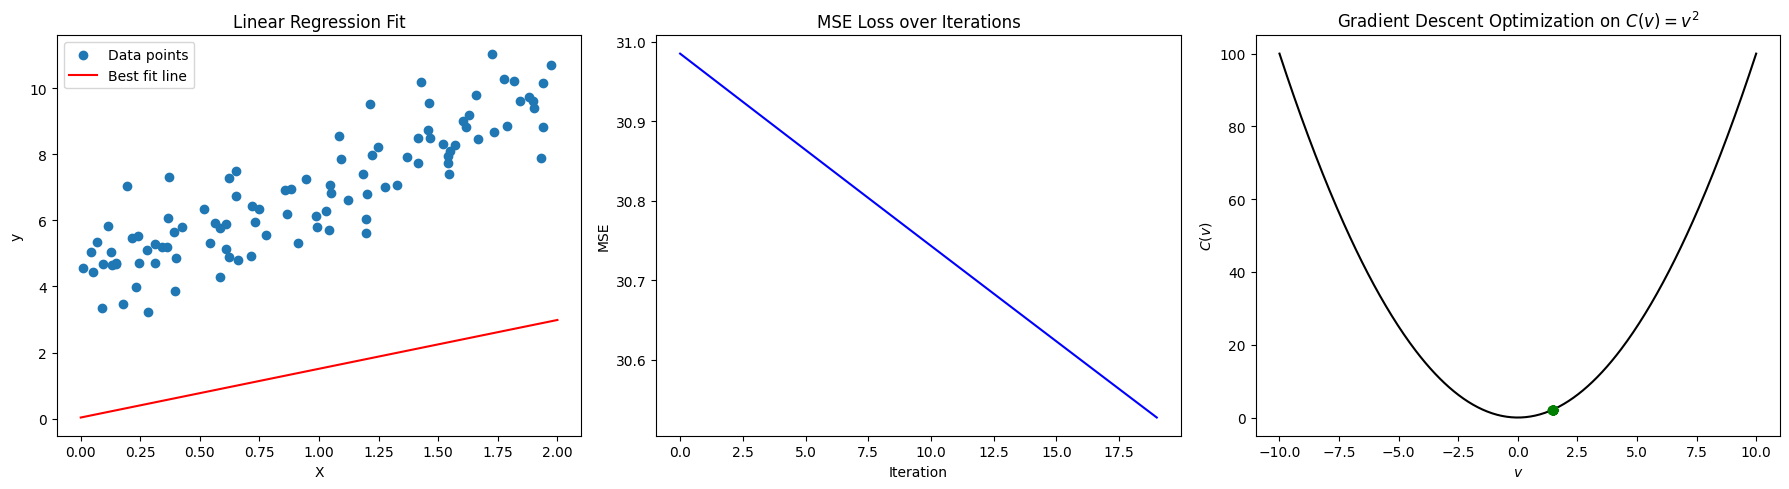

In [45]:
# 샘플 데이터 생성
np.random.seed(42)  # 난수 생성을 위한 시드 고정
X = 2 * np.random.rand(100, 1)  # 0에서 2 사이의 난수로 이루어진 100x1 배열 생성
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + N(0,1) 형태의 데이터 생성

# 각 인스턴스에 x0 = 1 추가 (절편 항을 위한)
X_b = np.c_[np.ones((100, 1)), X]  # 100x2 배열로 변환하여 첫 번째 열에 1 추가

# 하이퍼파라미터 설정
learning_rate = 0.0001  # 학습률 설정
n_iterations = 20  # 반복 횟수 설정
m = len(X_b)  # 데이터 포인트 수 설정

# theta (매개변수) 초기화
theta = np.random.randn(2, 1)  # 2x1 크기의 난수로 초기화된 매개변수 벡터 생성

# 평균 제곱 오차 (MSE) 손실 함수 정의
def compute_mse(X, y, theta):
    predictions = X.dot(theta)  # 예측값 계산
    error = predictions - y  # 오차 계산
    mse = (1/m) * np.sum(error ** 2)  # 평균 제곱 오차 계산
    return mse

# 경사 하강법 수행
theta_history = [theta]  # 매개변수 히스토리 초기화
mse_history = []  # 손실 히스토리 초기화

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # 그래디언트 계산
    theta = theta - learning_rate * gradients  # 매개변수 업데이트
    theta_history.append(theta)  # 매개변수 히스토리 업데이트
    mse = compute_mse(X_b, y, theta)  # 현재 MSE 계산
    mse_history.append(mse)  # MSE 히스토리 업데이트

theta_history = np.array(theta_history)  # 매개변수 히스토리를 numpy 배열로 변환

print(f"Optimal parameters: {theta}")  # 최적 매개변수 출력

# 서브플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열의 서브플롯 생성

# 데이터와 모델의 예측값을 플롯
ax[0].scatter(X, y, label='Data points')  # 데이터 포인트 산점도
X_new = np.array([[0], [2]])  # 새로운 x 값 생성
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 새로운 x 값에 절편 항 추가
y_predict = X_new_b.dot(theta)  # 예측값 계산
ax[0].plot(X_new, y_predict, color='red', label='Best fit line')  # 최적선 플롯
ax[0].set_xlabel('X')  # x축 라벨 설정
ax[0].set_ylabel('y')  # y축 라벨 설정
ax[0].legend()  # 범례 추가
ax[0].set_title('Linear Regression Fit')  # 플롯 제목 설정

# 반복에 따른 MSE 손실을 플롯
ax[1].plot(range(n_iterations), mse_history, color='blue')  # MSE 히스토리 플롯
ax[1].set_xlabel('Iteration')  # x축 라벨 설정
ax[1].set_ylabel('MSE')  # y축 라벨 설정
ax[1].set_title('MSE Loss over Iterations')  # 플롯 제목 설정

# 비용 함수와 그래디언트 시각화를 위한 함수 정의
def cost_function(v):
    return v ** 2  # 비용 함수 정의

# 경사 하강법 시각화를 위한 비용 함수 플롯
v_values = np.linspace(-10, 10, 400)  # -10에서 10까지 400개의 v 값 생성
C_values = cost_function(v_values)  # 비용 함수 값 계산
ax[2].plot(v_values, C_values, color='black')  # 비용 함수 플롯

# 경사 하강법이 방문한 점들을 플롯
v_history = theta_history[:, 1]  # 기울기(θ1) 값만 추출
C_history = cost_function(v_history)  # 각 θ1 값에 대한 비용 함수 값 계산
ax[2].plot(v_history, C_history, marker='o', color='green')  # 방문한 점 플롯

# 그래디언트 하강법 플롯에 라벨 및 제목 추가
ax[2].set_xlabel('$v$')  # x축 라벨 설정
ax[2].set_ylabel('$C(v)$')  # y축 라벨 설정
ax[2].set_title('Gradient Descent Optimization on $C(v) = v^2$')  # 플롯 제목 설정

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프를 화면에 표시